<a href="https://colab.research.google.com/github/data2450/solar_radiation-prediction/blob/main/solar_radiation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='https://raw.githubusercontent.com/data2450/datasets/main/TRAIN.csv'
train = pd.read_csv(url)
train.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1480107904,11/25/2016 12:00:00 AM,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00
1,1,1472818508,9/2/2016 12:00:00 AM,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00
2,2,1475804719,10/6/2016 12:00:00 AM,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00
3,3,1482533149,12/23/2016 12:00:00 AM,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00
4,4,1481883019,12/16/2016 12:00:00 AM,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00


In [ ]:
url='https://raw.githubusercontent.com/data2450/datasets/main/TEST.csv'
test = pd.read_csv(url)
test.head()

,idx,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,0,1482775250,12/26/2016 12:00:00 AM,08:00:50,48,30.47,101,187.78,4.50,06:55:00,17:51:00
1,1,1482774940,12/26/2016 12:00:00 AM,07:55:40,48,30.47,101,133.40,10.12,06:55:00,17:51:00
2,2,1482774649,12/26/2016 12:00:00 AM,07:50:49,48,30.47,101,160.69,5.62,06:55:00,17:51:00
3,3,1482774351,12/26/2016 12:00:00 AM,07:45:51,48,30.47,101,144.56,7.87,06:55:00,17:51:00
4,4,1482774039,12/26/2016 12:00:00 AM,07:40:39,48,30.47,101,169.05,10.12,06:55:00,17:51:00


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     26149 non-null  int64  
 1   UNIXTime                26149 non-null  int64  
 2   Data                    26149 non-null  object 
 3   Time                    26149 non-null  object 
 4   Radiation               26149 non-null  float64
 5   Temperature             26149 non-null  int64  
 6   Pressure                26149 non-null  float64
 7   Humidity                26149 non-null  int64  
 8   WindDirection(Degrees)  26149 non-null  float64
 9   Speed                   26149 non-null  float64
 10  TimeSunRise             26149 non-null  object 
 11  TimeSunSet              26149 non-null  object 
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6537 entries, 0 to 6536
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     6537 non-null   int64  
 1   UNIXTime                6537 non-null   int64  
 2   Data                    6537 non-null   object 
 3   Time                    6537 non-null   object 
 4   Temperature             6537 non-null   int64  
 5   Pressure                6537 non-null   float64
 6   Humidity                6537 non-null   int64  
 7   WindDirection(Degrees)  6537 non-null   float64
 8   Speed                   6537 non-null   float64
 9   TimeSunRise             6537 non-null   object 
 10  TimeSunSet              6537 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 561.9+ KB


In [ ]:
test.describe()

,idx,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,6537.000000,6.537000e+03,6537.000000,6537.000000,6537.000000,6537.000000,6537.000000
mean,3268.000000,1.481745e+09,47.836316,30.376486,81.613278,178.844800,6.738943
std,1887.213687,6.362826e+05,4.847630,0.078843,21.306379,87.664437,4.788839
min,0.000000,1.480586e+09,34.000000,30.190000,20.000000,0.170000,0.000000
25%,1634.000000,1.481301e+09,45.000000,30.320000,72.000000,126.110000,3.370000
50%,3268.000000,1.481792e+09,47.000000,30.380000,93.000000,170.010000,5.620000
75%,4902.000000,1.482285e+09,51.000000,30.430000,96.000000,236.520000,9.000000
max,6536.000000,1.482775e+09,62.000000,30.560000,103.000000,359.900000,40.500000


# EDA

In [ ]:
print(train.shape,': tarin shape \n')
print(test.shape,': test shape ')



(26149, 12) : tarin shape 

(6537, 11) : test shape 


In [ ]:
train.nunique()

idx                       26149
UNIXTime                  26149
Data                        118
Time                       7656
Radiation                 11879
Temperature                  37
Pressure                     38
Humidity                     94
WindDirection(Degrees)    15830
Speed                        37
TimeSunRise                  51
TimeSunSet                   56
dtype: int64

In [ ]:
train.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet'],
      dtype='object')

In [ ]:
train.describe()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,26149.000000,2.614900e+04,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000,26149.000000
mean,13074.000000,1.478046e+09,208.621000,51.135110,30.423005,74.970936,143.368247,6.262052
std,7548.710431,3.004309e+06,316.089736,6.212018,0.054679,26.008728,83.424186,3.503488
min,0.000000,1.472724e+09,1.110000,35.000000,30.190000,8.000000,0.090000,0.000000
25%,6537.000000,1.475544e+09,1.230000,46.000000,30.400000,56.000000,81.580000,3.370000
50%,13074.000000,1.478029e+09,2.720000,50.000000,30.430000,85.000000,147.320000,5.620000
75%,19611.000000,1.480473e+09,360.260000,55.000000,30.460000,97.000000,179.240000,7.870000
max,26148.000000,1.483264e+09,1601.260000,71.000000,30.560000,103.000000,359.940000,40.500000


62.000000	30.560000	103.000000	359.900000	40.500000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdadd648fd0>,
      dtype=object)

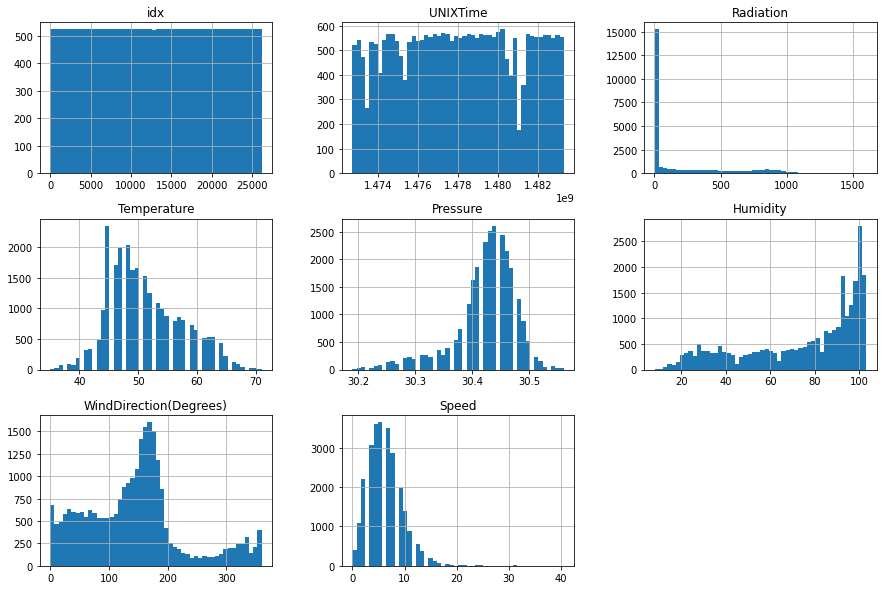

In [ ]:
train.hist(bins=50,figsize=(15,10))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


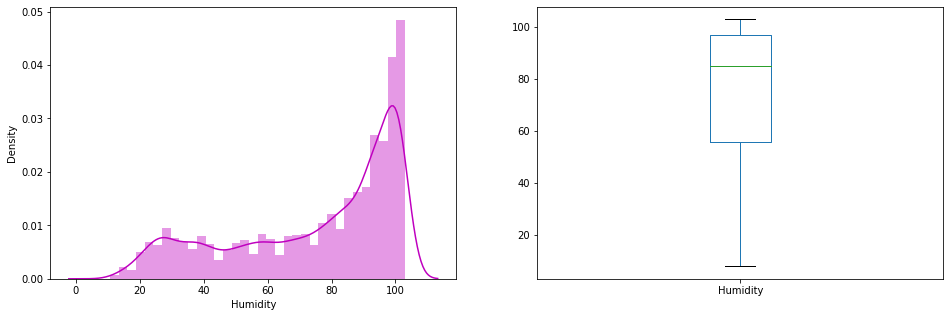

In [ ]:
import seaborn as sns
plt.subplot(121)
sns.distplot(train['Humidity'],color="m");

plt.subplot(122)
train['Humidity'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


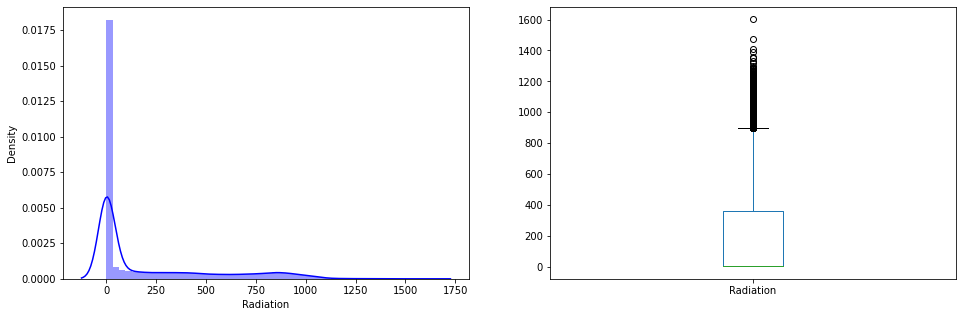

In [ ]:
import seaborn as sns
plt.subplot(121)
sns.distplot(train['Radiation'],color="b");

plt.subplot(122)
train['Radiation'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
train.loc[train['Radiation']==1601.260000	]

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
22312,22312,1473027304,9/4/2016 12:00:00 AM,12:15:04,1601.26,61,30.47,93,3.56,9.0,06:08:00,18:35:00


In [ ]:
train.shape

(26149, 12)

In [ ]:
#transactiondata.drop(transactiondata.index[transactiondata['LYLTY_CARD_NBR'] == 226000], inplace = True)

In [ ]:
##lets drop it 
train.drop(train.index[train['idx']==22312],inplace = True)

In [ ]:
train.shape

(26148, 12)

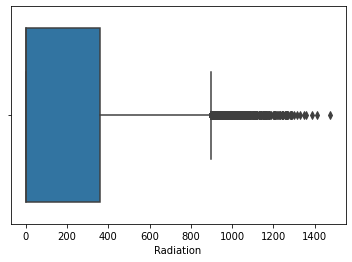

In [ ]:
sns.boxplot(x='Radiation',data=train)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


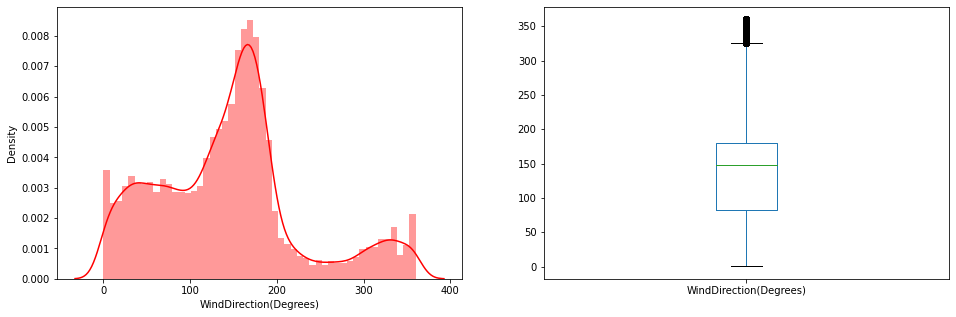

In [ ]:

plt.subplot(121)
sns.distplot(train['WindDirection(Degrees)'],color="r");

plt.subplot(122)
train['WindDirection(Degrees)'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


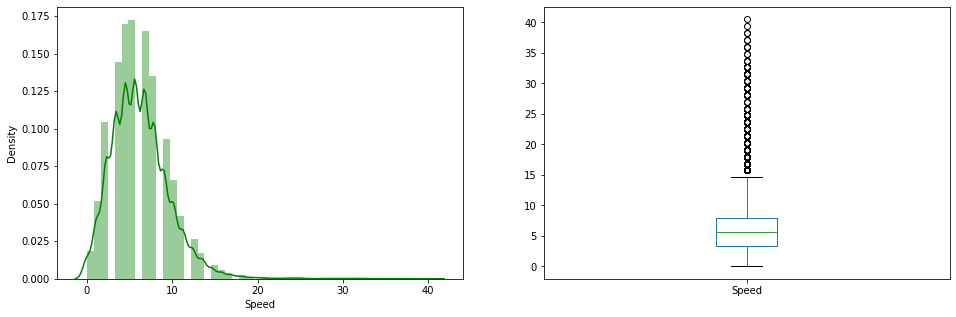

In [ ]:

plt.subplot(121)
sns.distplot(train['Speed'],color="g");

plt.subplot(122)
train['Speed'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
train.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


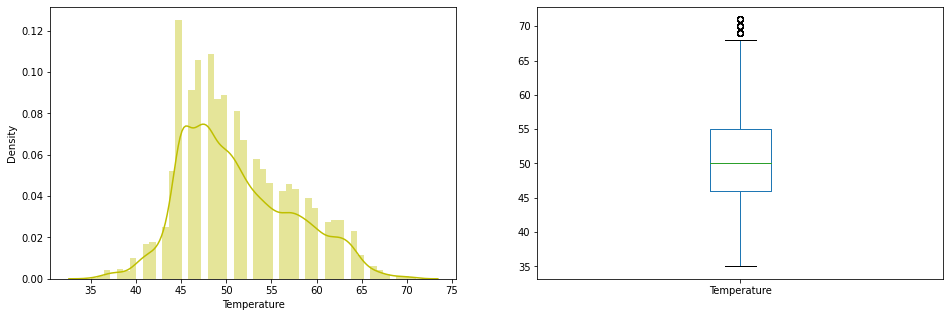

In [ ]:
plt.subplot(121)
sns.distplot(train['Temperature'],color="y");

plt.subplot(122)
train['Temperature'].plot.box(figsize=(16,5))

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


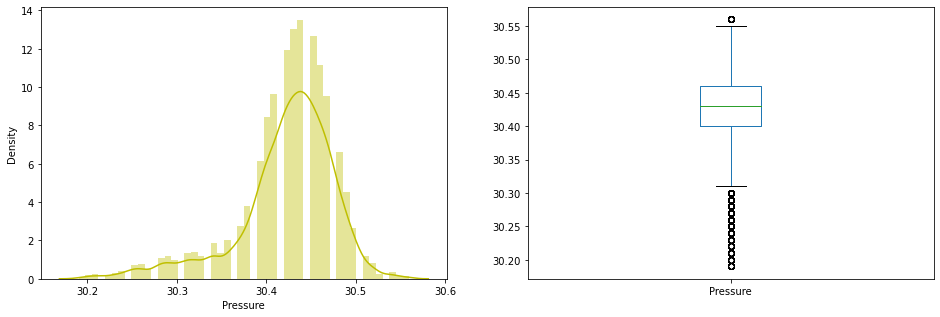

In [ ]:
plt.subplot(121)
sns.distplot(train['Pressure'],color="y");

plt.subplot(122)
train['Pressure'].plot.box(figsize=(16,5))

plt.show()

In [ ]:
sk_feat=['Radiation','Speed','WindDirection(Degrees)']

In [ ]:
train['Data']=pd.to_datetime(train.Data)

In [ ]:
train['month']=pd.to_datetime(train.Data, format="%d/%m/%Y% %H:%M:%S").dt.month

In [ ]:
train['date']=pd.to_datetime(train.Data, format="%d/%m/%Y% %H:%M:%S").dt.day

In [ ]:
train["t_hour"] = pd.to_datetime(train["Time"]).dt.hour
train["t_minute"] = pd.to_datetime(train["Time"]).dt.minute
#all_data["t_seconds"] = pd.to_datetime(all_data["Time"]).dt.second
#all_data[["t_hour",'Time','t_minute','t_seconds']].head()

In [ ]:
train["ss_hour"] = pd.to_datetime(train["TimeSunSet"]).dt.hour
train["ss_minute"] = pd.to_datetime(train["TimeSunSet"]).dt.minute
#all_data["sun_seconds"] = pd.to_datetime(all_data["Time"]).dt.second
#all_data[["ss_hour",'TimeSunSet','ss_minute']].head()

In [ ]:
#all_data["sr_hour"] = pd.to_datetime(all_data["TimeSunRise"]).dt.hour
train["sr_minute"] = pd.to_datetime(train["TimeSunRise"]).dt.minute
#all_data[["sr_hour",'TimeSunRise','sr_minute']].head()

In [ ]:
train.head()

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute
0,0,1480107904,2016-11-25,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00,11,25,11,5,17,42,37
1,1,1472818508,2016-09-02,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00,9,2,2,15,18,37,7
2,2,1475804719,2016-10-06,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00,10,6,15,45,18,7,15
3,3,1482533149,2016-12-23,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00,12,23,12,45,17,50,54
4,4,1481883019,2016-12-16,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00,12,16,0,10,17,46,50


In [ ]:
train.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet', 'month', 'date', 't_hour', 't_minute',
       'ss_hour', 'ss_minute', 'sr_minute'],
      dtype='object')

In [ ]:
train.shape

(26149, 19)

In [ ]:
train_new=train.drop(['Data','idx','Time','TimeSunRise','TimeSunSet'],axis=1)

In [ ]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26149 entries, 0 to 26148
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                26149 non-null  int64  
 1   Radiation               26149 non-null  float64
 2   Temperature             26149 non-null  int64  
 3   Pressure                26149 non-null  float64
 4   Humidity                26149 non-null  int64  
 5   WindDirection(Degrees)  26149 non-null  float64
 6   Speed                   26149 non-null  float64
 7   month                   26149 non-null  int64  
 8   date                    26149 non-null  int64  
 9   t_hour                  26149 non-null  int64  
 10  t_minute                26149 non-null  int64  
 11  ss_hour                 26149 non-null  int64  
 12  ss_minute               26149 non-null  int64  
 13  sr_minute               26149 non-null  int64  
dtypes: float64(4), int64(10)
memory usage:

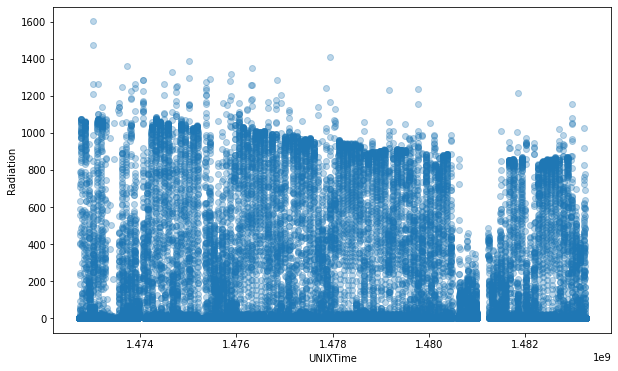

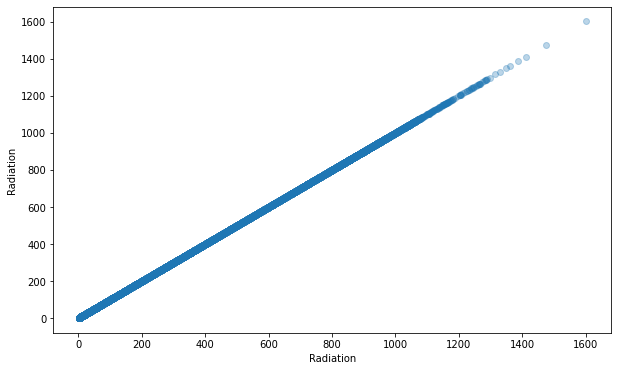

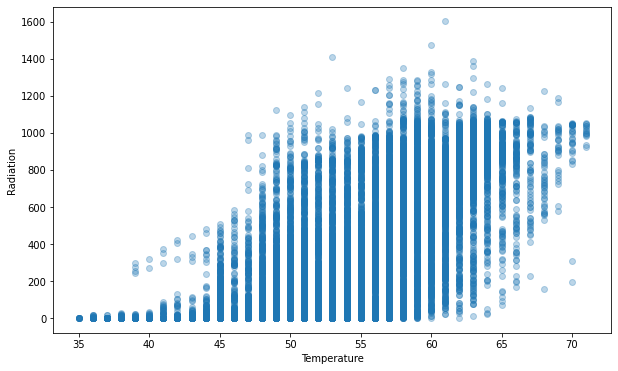

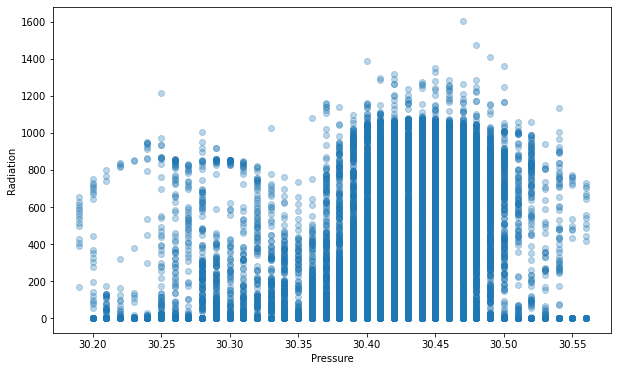

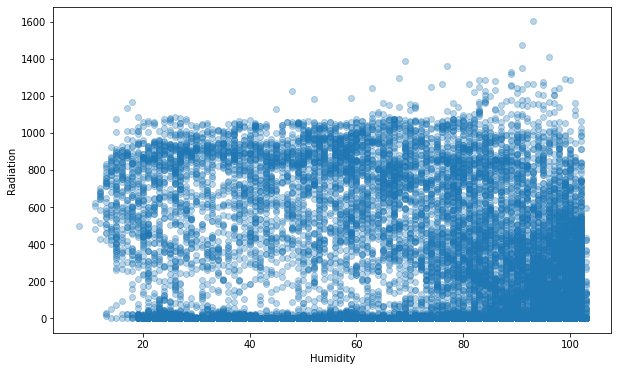

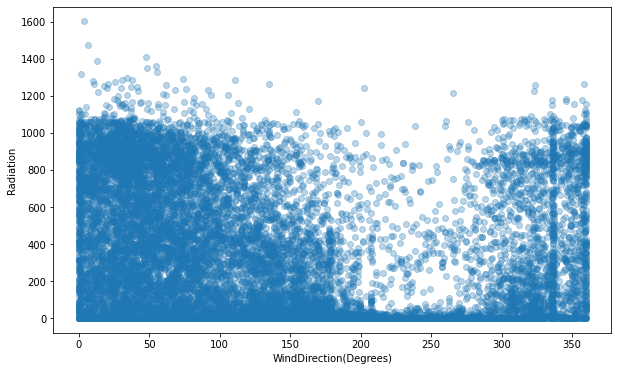

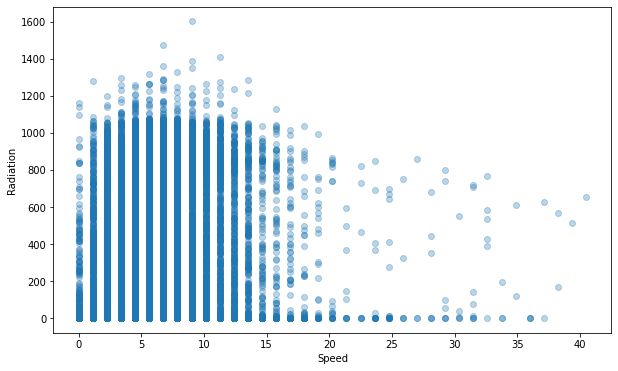

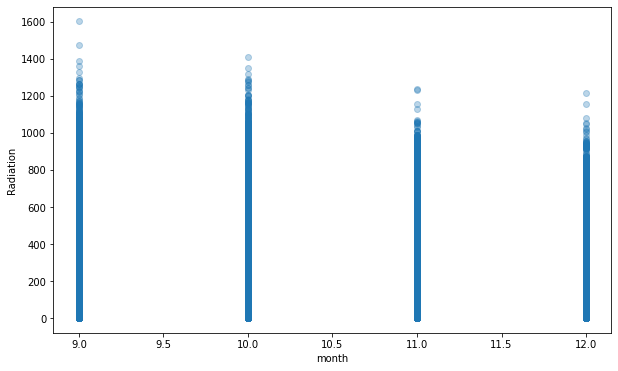

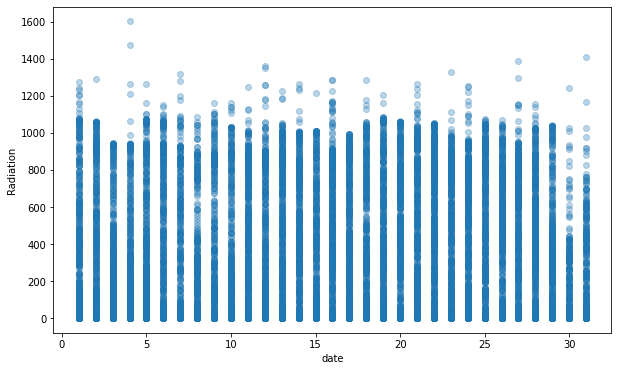

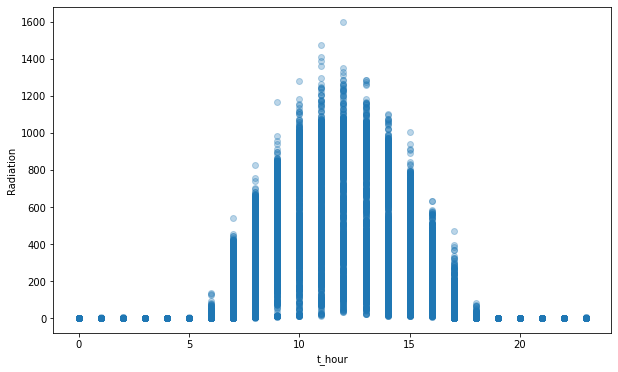

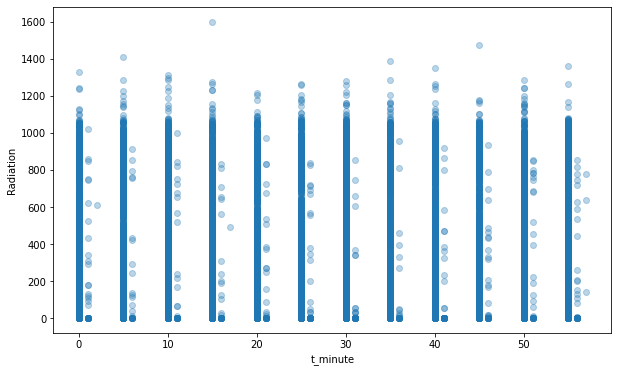

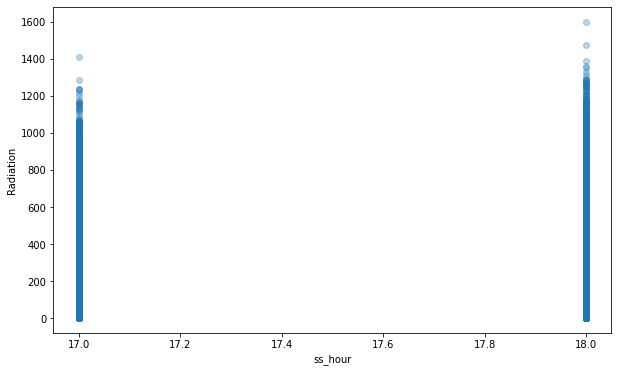

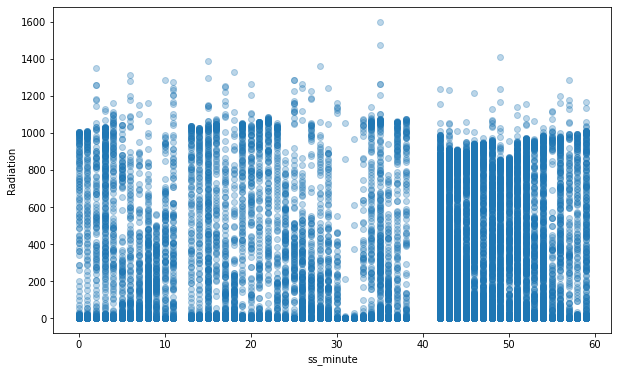

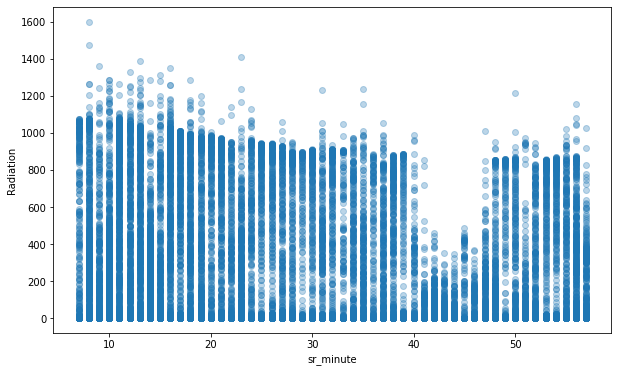

In [ ]:
for feature in train_new:
        plt.figure(figsize=(10,6))
    
        data=train_new.copy()
        plt.scatter(data[feature],data['Radiation'],alpha=0.3)
        plt.xlabel(feature)
        plt.ylabel('Radiation')
        plt.show()

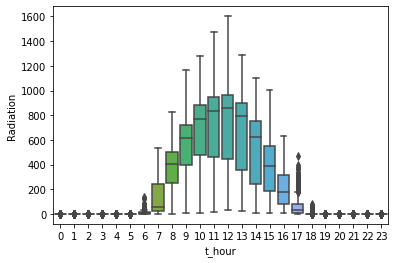

In [ ]:
sns.boxplot(x="t_hour", y="Radiation", data=train_new )

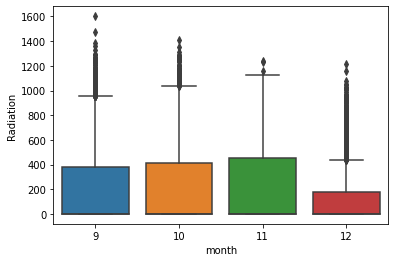

In [ ]:
#fig_dims = (20, 30)
#fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x="month", y="Radiation", data=train_new )

In [ ]:
train_new.columns

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'date', 't_hour',
       't_minute', 'ss_hour', 'ss_minute', 'sr_minute'],
      dtype='object')

In [ ]:
from scipy.special import boxcox1p

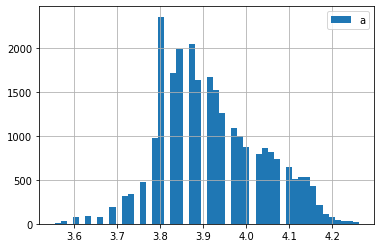

In [ ]:
train_new['Temperature'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
plt.legend()

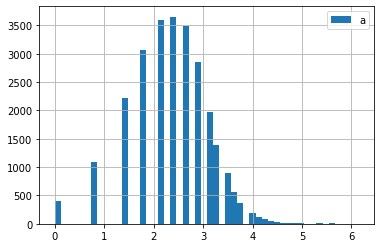

In [ ]:
train_new['Speed'].apply(lambda x: boxcox1p(x,0.25) ).hist(bins=50,label='a')
plt.legend()

In [ ]:
#train_new['Pressure'].apply(lambda x: boxcox1p(x,9) ).hist(bins=50,label='a')
#plt.legend()

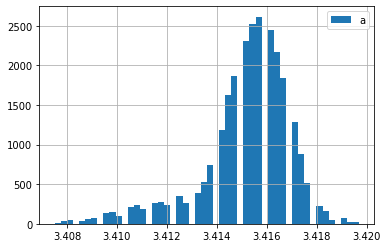

In [ ]:
train_new['Pressure'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
plt.legend()

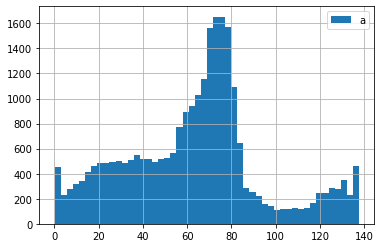

In [ ]:
train_new['WindDirection(Degrees)'].apply(lambda x: boxcox1p(x,0.8) ).hist(bins=50,label='a')
plt.legend()

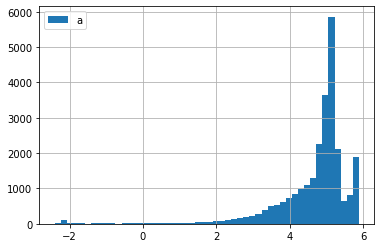

In [ ]:
train_new['WindDirection(Degrees)'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
plt.legend()

In [ ]:
#train_new['Radiation'].apply(lambda x: np.log(x) ).hist(bins=50,label='a')
#plt.legend()

In [ ]:
#train_new['Radiation'].apply(lambda x: np.log1p(x)**4).hist(bins=50,label='a')
#plt.legend()

In [ ]:
#train_new['Radiation'].apply(lambda x: boxcox1p(x,0.25) ).hist(bins=50,label='a')
#plt.legend()

In [ ]:
#train_new['Temperature'].apply(lambda x: boxcox1p(x,0.9) ).hist(bins=50,label='a')
#plt.legend()

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [ ]:
class FeaturesTransformer(BaseEstimator,TransformerMixin):
    """This class trnsforms numberical featuress in the dataset.
    Note: Transformations are hard coded.
    """
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        import numpy as np
        from scipy.special import boxcox1p        
        X['Temperature']=X['Temperature'].apply(lambda x:np.log(x))
        
        X['Speed']=X['Speed'].apply(lambda x:boxcox1p(x,0.25) )
        
        X['Pressure']=X['Pressure'].apply(lambda x: np.log(x))
        
        X['WindDirection(Degrees)']=X['WindDirection(Degrees)'].apply(lambda x: boxcox1p(x,0.8))
        
        return X

In [ ]:
train2=FeaturesTransformer().fit_transform(train_new)

In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26148 entries, 0 to 26148
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                26148 non-null  int64  
 1   Radiation               26148 non-null  float64
 2   Temperature             26148 non-null  float64
 3   Pressure                26148 non-null  float64
 4   Humidity                26148 non-null  int64  
 5   WindDirection(Degrees)  26148 non-null  float64
 6   Speed                   26148 non-null  float64
 7   month                   26148 non-null  int64  
 8   date                    26148 non-null  int64  
 9   t_hour                  26148 non-null  int64  
 10  t_minute                26148 non-null  int64  
 11  ss_hour                 26148 non-null  int64  
 12  ss_minute               26148 non-null  int64  
 13  sr_minute               26148 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 

## Data column
the data column consist of date month year and time ,lets split them to single single  for better understanding.

In [ ]:
#combining the train test 
train['train_test'] = 1
test['train_test'] = 0
all_data = pd.concat([train,test])

%matplotlib inline
all_data.shape

(32685, 20)

In [ ]:
all_data['Data']=pd.to_datetime(all_data.Data)


In [ ]:
#lets first convert it into datetime datatype to extract the details

all_data["date"] = pd.to_datetime(all_data.Data, format="%y-%m-%d %H:%M:%S").dt.day
all_data['month']=pd.to_datetime(all_data.Data, format="%d/%m/%Y% %H:%M:%S").dt.month
all_data['year']=pd.to_datetime(all_data.Data, format="%d/%m/%Y% %H:%M:%S").dt.year

In [ ]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32685 entries, 0 to 6536
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   idx                     32685 non-null  int64         
 1   UNIXTime                32685 non-null  int64         
 2   Data                    32685 non-null  datetime64[ns]
 3   Time                    32685 non-null  object        
 4   Radiation               26148 non-null  float64       
 5   Temperature             32685 non-null  int64         
 6   Pressure                32685 non-null  float64       
 7   Humidity                32685 non-null  int64         
 8   WindDirection(Degrees)  32685 non-null  float64       
 9   Speed                   32685 non-null  float64       
 10  TimeSunRise             32685 non-null  object        
 11  TimeSunSet              32685 non-null  object        
 12  month                   32685 non-null  int64  

In [ ]:
all_data.sort_values(by=['Data','Time'],ascending=True).head(10)
#lets check in one day how many times the reading of the readiation is checked
#so the time of radiation observed will be related to the time also,lets check that

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute,train_test,year
17748,17748,1472724008,2016-09-01,00:00:08,2.58,51,30.43,103,77.27,11.25,06:07:00,18:38:00,9,1,0.0,0.0,18.0,38.0,7.0,1,2016
25149,25149,1472724310,2016-09-01,00:05:10,2.83,51,30.43,103,153.44,9.00,06:07:00,18:38:00,9,1,0.0,5.0,18.0,38.0,7.0,1,2016
4529,4529,1472725206,2016-09-01,00:20:06,2.16,51,30.43,103,142.04,7.87,06:07:00,18:38:00,9,1,0.0,20.0,18.0,38.0,7.0,1,2016
12164,12164,1472725809,2016-09-01,00:30:09,2.25,51,30.43,103,67.42,11.25,06:07:00,18:38:00,9,1,0.0,30.0,18.0,38.0,7.0,1,2016
250,250,1472726704,2016-09-01,00:45:04,2.15,51,30.43,103,67.85,4.50,06:07:00,18:38:00,9,1,0.0,45.0,18.0,38.0,7.0,1,2016
5239,5239,1472727006,2016-09-01,00:50:06,2.07,51,30.43,103,156.58,1.12,06:07:00,18:38:00,9,1,0.0,50.0,18.0,38.0,7.0,1,2016
10996,10996,1472727304,2016-09-01,00:55:04,2.06,52,30.43,103,69.98,7.87,06:07:00,18:38:00,9,1,0.0,55.0,18.0,38.0,7.0,1,2016
11473,11473,1472727607,2016-09-01,01:00:07,2.10,52,30.43,103,92.15,4.50,06:07:00,18:38:00,9,1,1.0,0.0,18.0,38.0,7.0,1,2016
5974,5974,1472728206,2016-09-01,01:10:06,2.10,51,30.42,103,158.06,4.50,06:07:00,18:38:00,9,1,1.0,10.0,18.0,38.0,7.0,1,2016
25400,25400,1472728514,2016-09-01,01:15:14,2.40,51,30.42,103,39.69,3.37,06:07:00,18:38:00,9,1,1.0,15.0,18.0,38.0,7.0,1,2016


In [ ]:
print(all_data[all_data['Data']=='2016-09-01'].shape)
print(all_data[all_data['Data']=='2016-09-02'].shape)
print(all_data[all_data['Data']=='2016-09-03'].shape)
print(all_data[all_data['Data']=='2016-09-04'].shape)
#the n.o of reading in each day is different

(200, 21)
(220, 21)
(222, 21)
(228, 21)


In [ ]:
all_data.Time

0       11:05:04
1       02:15:08
2       15:45:19
3       12:45:49
4       00:10:19
          ...   
6532    00:20:04
6533    00:15:01
6534    00:10:01
6535    00:05:02
6536    00:00:02
Name: Time, Length: 32685, dtype: object

In [ ]:

#the time column corresponds to time at which the radiation reading has taken
#lets seprate the hours and minutes,probably we don"t need the seconds
#prob:we should be able to deal with seconds in this column 


all_data["t_hour"] = pd.to_datetime(all_data["Time"]).dt.hour
all_data["t_minute"] = pd.to_datetime(all_data["Time"]).dt.minute
all_data["t_seconds"] = pd.to_datetime(all_data["Time"]).dt.second
all_data[["t_hour",'Time','t_minute','t_seconds']].head()

,t_hour,Time,t_minute,t_seconds
0,11,11:05:04,5,4
1,2,02:15:08,15,8
2,15,15:45:19,45,19
3,12,12:45:49,45,49
4,0,00:10:19,10,19


In [ ]:
all_data.	TimeSunSet

0       17:42:00
1       18:37:00
2       18:07:00
3       17:50:00
4       17:46:00
          ...   
6532    17:42:00
6533    17:42:00
6534    17:42:00
6535    17:42:00
6536    17:42:00
Name: TimeSunSet, Length: 32685, dtype: object

In [ ]:
all_data["ss_hour"] = pd.to_datetime(all_data["TimeSunSet"]).dt.hour
all_data["ss_minute"] = pd.to_datetime(all_data["TimeSunSet"]).dt.minute
#all_data["sun_seconds"] = pd.to_datetime(all_data["Time"]).dt.second
all_data[["ss_hour",'TimeSunSet','ss_minute']].head()

,ss_hour,TimeSunSet,ss_minute
0,17,17:42:00,42
1,18,18:37:00,37
2,18,18:07:00,7
3,17,17:50:00,50
4,17,17:46:00,46


In [ ]:
all_data.TimeSunRise

0       06:37:00
1       06:07:00
2       06:15:00
3       06:54:00
4       06:50:00
          ...   
6532    06:41:00
6533    06:41:00
6534    06:41:00
6535    06:41:00
6536    06:41:00
Name: TimeSunRise, Length: 32685, dtype: object

In [ ]:
all_data["sr_hour"] = pd.to_datetime(all_data["TimeSunRise"]).dt.hour
all_data["sr_minute"] = pd.to_datetime(all_data["TimeSunRise"]).dt.minute
all_data[["sr_hour",'TimeSunRise','sr_minute']].head()

,sr_hour,TimeSunRise,sr_minute
0,6,06:37:00,37
1,6,06:07:00,7
2,6,06:15:00,15
3,6,06:54:00,54
4,6,06:50:00,50


In [ ]:
all_data.head(10)

,idx,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute,train_test,year,t_seconds,sr_hour
0,0,1480107904,2016-11-25,11:05:04,288.44,46,30.48,101,129.84,13.50,06:37:00,17:42:00,11,25,11,5,17,42,37,1,2016,4,6
1,1,1472818508,2016-09-02,02:15:08,2.79,50,30.42,75,173.90,6.75,06:07:00,18:37:00,9,2,2,15,18,37,7,1,2016,8,6
2,2,1475804719,2016-10-06,15:45:19,118.05,54,30.42,100,7.35,1.12,06:15:00,18:07:00,10,6,15,45,18,7,15,1,2016,19,6
3,3,1482533149,2016-12-23,12:45:49,853.17,58,30.44,57,81.67,11.25,06:54:00,17:50:00,12,23,12,45,17,50,54,1,2016,49,6
4,4,1481883019,2016-12-16,00:10:19,1.24,42,30.24,103,171.13,2.25,06:50:00,17:46:00,12,16,0,10,17,46,50,1,2016,19,6
5,5,1480681204,2016-12-02,02:20:04,1.20,45,30.38,93,155.13,9.00,06:42:00,17:42:00,12,2,2,20,17,42,42,1,2016,4,6
6,6,1482304523,2016-12-20,21:15:23,1.22,47,30.51,82,152.61,6.75,06:52:00,17:48:00,12,20,21,15,17,48,52,1,2016,23,6
7,7,1480276820,2016-11-27,10:00:20,710.57,54,30.48,49,97.52,11.25,06:38:00,17:42:00,11,27,10,0,17,42,38,1,2016,20,6
8,8,1480110302,2016-11-25,11:45:02,808.38,47,30.47,100,109.91,13.50,06:37:00,17:42:00,11,25,11,45,17,42,37,1,2016,2,6
9,9,1478135421,2016-11-02,15:10:21,614.69,61,30.42,22,67.67,6.75,06:24:00,17:48:00,11,2,15,10,17,48,24,1,2016,21,6


In [ ]:
all_data.describe()

,idx,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute,train_test,year,t_seconds,sr_hour
count,32685.000000,3.268500e+04,26148.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.000000,32685.0,32685.000000,32685.0
mean,11112.517363,1.478786e+09,208.567741,50.475050,30.413700,76.298853,150.467835,6.357346,10.819826,15.461251,11.533211,27.520453,17.278048,39.077559,31.858987,0.800000,2016.0,19.356586,6.0
std,7853.790085,3.080626e+06,315.978425,6.108143,0.063096,25.278687,85.471574,3.800270,1.144738,8.483868,6.904823,17.250341,0.448044,14.703724,16.349630,0.400006,0.0,14.449945,0.0
min,0.000000,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000,9.000000,1.000000,0.000000,0.000000,17.000000,0.000000,7.000000,0.000000,2016.0,0.000000,6.0
25%,4085.000000,1.476177e+09,1.230000,46.000000,30.390000,59.000000,88.580000,3.370000,10.000000,9.000000,6.000000,11.000000,17.000000,35.000000,16.000000,1.000000,2016.0,5.000000,6.0
50%,9805.000000,1.479261e+09,2.715000,49.000000,30.430000,87.000000,152.900000,5.620000,11.000000,16.000000,12.000000,30.000000,17.000000,44.000000,31.000000,1.000000,2016.0,18.000000,6.0
75%,17976.000000,1.481623e+09,360.102500,54.000000,30.460000,97.000000,184.930000,7.870000,12.000000,23.000000,18.000000,45.000000,18.000000,48.000000,48.000000,1.000000,2016.0,24.000000,6.0
max,26148.000000,1.483264e+09,1475.400000,71.000000,30.560000,103.000000,359.940000,40.500000,12.000000,31.000000,23.000000,57.000000,18.000000,59.000000,57.000000,1.000000,2016.0,59.000000,6.0


before we bulid our base model lets drop the unnecessory columns

In [ ]:
all_data.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet', 'month', 'date', 't_hour', 't_minute',
       'ss_hour', 'ss_minute', 'sr_minute', 'train_test', 'year', 't_seconds',
       'sr_hour'],
      dtype='object')

In [ ]:
train.columns

Index(['idx', 'UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature',
       'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
       'TimeSunRise', 'TimeSunSet', 'month', 'date', 't_hour', 't_minute',
       'ss_hour', 'ss_minute', 'sr_minute', 'train_test'],
      dtype='object')

In [ ]:
#sunrise hour and year of radiation taken are same along all the rows ,so we are dropping them

data=all_data.drop(['Data','Time','TimeSunRise','TimeSunSet','year','sr_hour','t_seconds'],axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32685 entries, 0 to 6536
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idx                     32685 non-null  int64  
 1   UNIXTime                32685 non-null  int64  
 2   Radiation               26148 non-null  float64
 3   Temperature             32685 non-null  int64  
 4   Pressure                32685 non-null  float64
 5   Humidity                32685 non-null  int64  
 6   WindDirection(Degrees)  32685 non-null  float64
 7   Speed                   32685 non-null  float64
 8   month                   32685 non-null  int64  
 9   date                    32685 non-null  int64  
 10  t_hour                  32685 non-null  int64  
 11  t_minute                32685 non-null  int64  
 12  ss_hour                 32685 non-null  int64  
 13  ss_minute               32685 non-null  int64  
 14  sr_minute               32685 non-null 

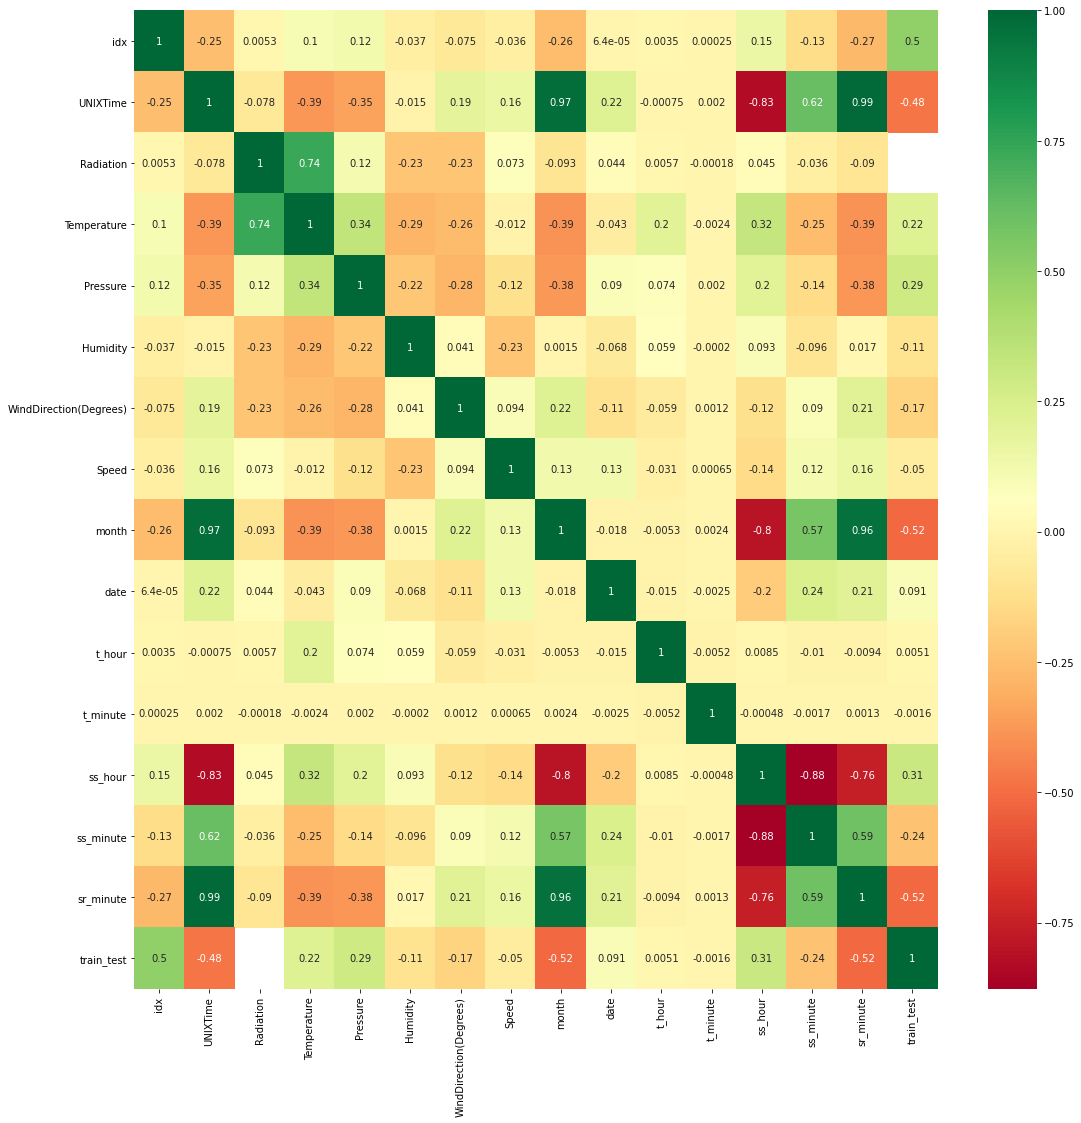

In [ ]:
import seaborn as sns
plt.figure(figsize = (18,18))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [ ]:
#idx is just an id we does"nt need it for the model buliding
#and also the seconds dosent have any influence on the target variable

# feature engeneering

In [ ]:
data.columns

Index(['idx', 'UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'date', 't_hour',
       't_minute', 'ss_hour', 'ss_minute', 'sr_minute', 'train_test'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


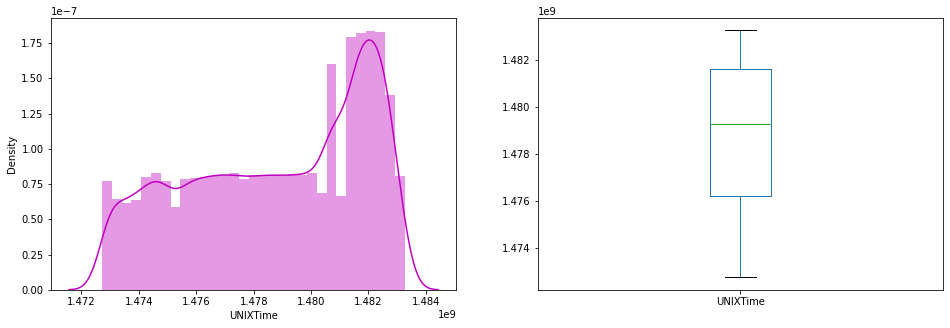

In [ ]:

plt.subplot(121)
sns.distplot(data['UNIXTime'],color="m");

plt.subplot(122)
data['UNIXTime'].plot.box(figsize=(16,5))

plt.show()
#we have some outliers

In [ ]:
#we can do normalizaton on both UNIXTime & WindDirection(Degrees)

In [ ]:
train1=data.loc[data['train_test']==1]
print(train1.shape)
print(train1.columns)

(26148, 16)
Index(['idx', 'UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'date', 't_hour',
       't_minute', 'ss_hour', 'ss_minute', 'sr_minute', 'train_test'],
      dtype='object')


In [ ]:
test1=data.loc[data['train_test']==0]
print(test1.shape)
print(test1.columns)

(6537, 16)
Index(['idx', 'UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'date', 't_hour',
       't_minute', 'ss_hour', 'ss_minute', 'sr_minute', 'train_test'],
      dtype='object')


In [ ]:
X_test_true=test1.drop(['idx','Radiation'],axis=1)
print(X_test_true.shape)
X_test_true

(6537, 14)


,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute,train_test
0,1482775250,48,30.47,101,187.78,4.50,12,26,8,0,17,51,55,0
1,1482774940,48,30.47,101,133.40,10.12,12,26,7,55,17,51,55,0
2,1482774649,48,30.47,101,160.69,5.62,12,26,7,50,17,51,55,0
3,1482774351,48,30.47,101,144.56,7.87,12,26,7,45,17,51,55,0
4,1482774039,48,30.47,101,169.05,10.12,12,26,7,40,17,51,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6532,1480587604,44,30.43,102,145.42,6.75,12,1,0,20,17,42,41,0
6533,1480587301,44,30.42,102,117.78,6.75,12,1,0,15,17,42,41,0
6534,1480587001,44,30.42,102,145.19,9.00,12,1,0,10,17,42,41,0
6535,1480586702,44,30.42,101,164.19,7.87,12,1,0,5,17,42,41,0


In [ ]:
#divide the train to dependent and independent

X_train4=train1.drop(['idx','Radiation'],axis=1)


In [ ]:
X_train4.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,date,t_hour,t_minute,ss_hour,ss_minute,sr_minute,train_test
0,1480107904,46,30.48,101,129.84,13.50,11,25,11,5,17,42,37,1
1,1472818508,50,30.42,75,173.90,6.75,9,2,2,15,18,37,7,1
2,1475804719,54,30.42,100,7.35,1.12,10,6,15,45,18,7,15,1
3,1482533149,58,30.44,57,81.67,11.25,12,23,12,45,17,50,54,1
4,1481883019,42,30.24,103,171.13,2.25,12,16,0,10,17,46,50,1


In [ ]:
y_train=train1['Radiation']
y_train

0        288.44
1          2.79
2        118.05
3        853.17
4          1.24
          ...  
26144      1.20
26145      1.27
26146      1.22
26147      1.25
26148     15.62
Name: Radiation, Length: 26148, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train4)
X_test = sc.transform(X_test_true)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(selection.feature_importances_)

[0.01571234 0.40627005 0.01571403 0.05791066 0.08963018 0.01046318
 0.00798971 0.0225636  0.32490537 0.01400978 0.01130372 0.01144225
 0.01208512 0.        ]


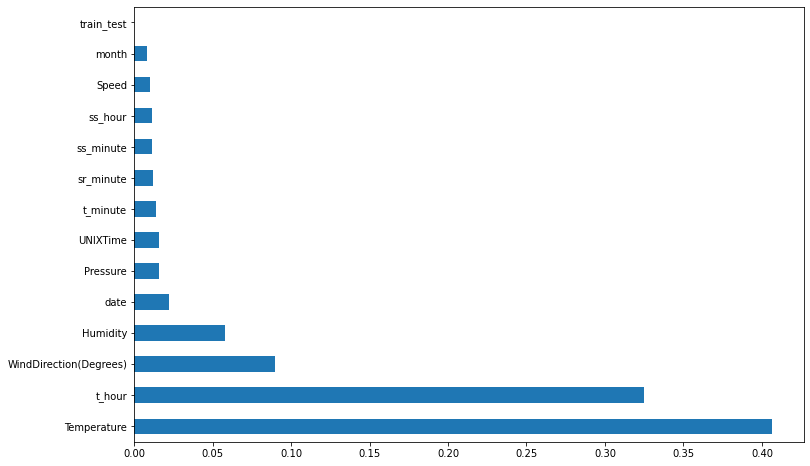

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X_train4.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state =1)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
reg_rf.score(X_train, y_train)

0.9919860091169976

In [ ]:
prediction=reg_rf.predict(X_test).astype(int)

In [ ]:
prediction1=reg_rf.predict(X_test)

In [ ]:
prediction1

array([159.5448,  79.1158,  69.5693, ...,   1.2015,   1.2217,   1.2036])

In [ ]:
test1.columns

Index(['idx', 'UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'month', 'date', 't_hour',
       't_minute', 'ss_hour', 'ss_minute', 'sr_minute', 'train_test'],
      dtype='object')

In [ ]:
final_data1 = {'idx': test1.idx, 'Radiation': prediction1}
submission1 = pd.DataFrame(data=final_data1)


In [ ]:
final_data = {'idx': test1.idx, 'Radiation': prediction}
submission = pd.DataFrame(data=final_data)


In [ ]:
submission1

,idx,Radiation
0,0,159.5448
1,1,79.1158
2,2,69.5693
3,3,61.0805
4,4,52.1535
...,...,...
6532,6532,1.2112
6533,6533,1.1832
6534,6534,1.2015
6535,6535,1.2217


In [ ]:
submission1.to_csv('submission_rf1.csv', index =False)

In [ ]:
submission

,idx,Radiation
0,0,159
1,1,79
2,2,69
3,3,61
4,4,52
...,...,...
6532,6532,1
6533,6533,1
6534,6534,1
6535,6535,1


In [ ]:
submission.to_csv('submission_rf.csv', index =False)

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='r2', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  18.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  29.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 27.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [ ]:
prediction2 = rf_random.predict(X_test).astype(int)

In [ ]:
prediction2

array([176,  69,  62, ...,   1,   1,   1])

In [ ]:
final_data2 = {'idx': test1.idx, 'Radiation': prediction2}
submission2 = pd.DataFrame(data=final_data2)


In [ ]:
submission2

,idx,Radiation
0,0,176
1,1,69
2,2,62
3,3,63
4,4,53
...,...,...
6532,6532,1
6533,6533,1
6534,6534,1
6535,6535,1


In [ ]:
submission2.to_csv('submission_rf378.csv', index =False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [ ]:
X_train1.shape

(20918, 14)

In [ ]:
'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700)

SyntaxError: ignored

In [ ]:
reg_rf3 = RandomForestRegressor()
 
reg_rf3.fit(X_train1, y_train1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf34 = RandomForestRegressor(max_depth=20,max_features='auto',min_samples_leaf=1,min_samples_split=15,n_estimators=700)
 
reg_rf34.fit(X_train1, y_train1)

In [ ]:
reg_rf34.score(X_train1, y_train1)

In [ ]:
y_pred=reg_rf34.predict(X_test1)

In [ ]:
y_pred1=reg_rf3.predict(X_test1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test1, y_pred))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred)))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test1, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test1, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))

In [ ]:
reg_rf34.score(X_test, y_test)

In [ ]:
reg_rf34.score(X_test, y_test)

In [ ]:
prediction3=reg_rf3.predict(X_test_true).astype(int)

In [ ]:
prediction3

In [ ]:
final_data3 = {'idx': test1.idx, 'Radiation': prediction3}
submission23= pd.DataFrame(data=final_data3)


In [ ]:
submission23.shape

In [ ]:
submission23.to_csv('submission_rf4.csv', index =False)

In [ ]:
from sklearn import metrics

In [ ]:
X_test_true=FeaturesTransformer().fit_transform(X_test_true)

In [ ]:
#X_test_true=X_test_true.drop(['date','train_test','UNIXTime'],axis=1)

In [ ]:
X_test_true.info()

In [ ]:
train2.info()

In [ ]:
X=train2.drop(['Radiation'],axis=1)
y=train2['Radiation']

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X)
X_test = sc.transform(X_test_true)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y)

In [ ]:
reg_rf.score(X_train, y)

In [ ]:
pr1=reg_rf.predict(X_test)

In [ ]:
pr1

In [ ]:
final_data1 = {'idx': test1.idx, 'Radiation': pr1}
submission1 = pd.DataFrame(data=final_data1)

In [ ]:
submission1

In [ ]:
submission1.to_csv('submission_rf3.csv', index =False)